In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train = pd.read_csv("train_t.csv")
test = pd.read_csv("test_t.csv")

In [3]:
train

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [4]:
test

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...
...,...,...
97315,7194635,He should lose his job for promoting mis-infor...
97316,7194636,"""Thinning project is meant to lower fire dange..."
97317,7194637,I hope you millennials are happy that you put ...
97318,7194638,I'm thinking Kellyanne Conway (a.k.a. The Trum...


In [5]:
!pip install BeautifulSoup4


In [6]:
train_sample = train.sample(frac = 0.1, random_state = 42, axis = 'index')


In [7]:
train_sample

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
286892,593336,0.166667,What a breathe of fresh air to have someone wh...,0.0,0.000000,0.000000,0.166667,0.000000,NaN,NaN,...,151356,approved,0,0,0,4,0,0.000000,0,6
419218,756192,0.600000,Your jewish friends were the ones who told you...,0.2,0.000000,0.600000,0.400000,0.000000,0.0,0.0,...,158493,approved,0,0,0,0,0,0.000000,6,10
1055330,5407051,0.000000,Possible collusion by Trump and his affiliates...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,343435,approved,0,0,0,1,0,0.000000,0,4
1382764,5808132,0.000000,Exactly. We need a % of GDP spending cap at t...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,368584,approved,0,0,0,7,0,0.000000,0,4
256049,557013,0.000000,"By your own comment, even if some of them vote...",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,149754,approved,0,0,0,1,0,0.000000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654493,6149955,0.000000,"Thanks Rebecca, but you need to tell the enti...",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,388080,approved,0,0,0,0,0,0.000000,0,4
1469254,5917084,0.000000,"Deflection not working, SJSJ. The fact that yo...",0.0,0.166667,0.166667,0.000000,0.166667,NaN,NaN,...,375297,approved,0,0,0,2,1,0.000000,0,6
236950,533135,0.000000,Come on AFN. Don't keep falling for the polit...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,148701,approved,0,0,0,9,0,0.000000,0,4
98687,362886,0.166667,Me Larson is a vigilante,0.0,0.000000,0.166667,0.000000,0.166667,NaN,NaN,...,139532,approved,0,0,0,2,0,0.166667,0,6


In [8]:
from bs4 import BeautifulSoup # Text Cleaning
import re, string # Regular Expressions, String
from nltk.corpus import stopwords # stopwords
from nltk.stem.porter import PorterStemmer # for word stemming
from nltk.stem import WordNetLemmatizer # for word lemmatization
import unicodedata
import html

# set of stopwords to be removed from text
stop = set(stopwords.words('english'))

# update stopwords to have punctuation too
stop.update(list(string.punctuation))

def clean_text(text):
    
    # Remove unwanted html characters
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
    'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
    '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
    ' @-@ ', '-').replace('\\', ' \\ ')
    text = re1.sub(' ', html.unescape(x1))
    
    # remove non-ascii characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
#     # strip html
#     soup = BeautifulSoup(text, 'html.parser')
#     text = soup.get_text()
    
    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove twitter tags
    text = text.replace("@", "")
    
    # remove hashtags
    text = text.replace("#", "")
    
    # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z ]', '', text)
    
    # remove stopwords from text
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip().lower())
    
    text = " ".join(final_text)
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()    
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    text = " ".join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    
    # replace all numbers with "num"
    text = re.sub("\d", "num", text)
    
    return text.lower()

In [9]:
train_data = train
train_data['threat'] = np.where(train_data['threat'] >= .25, 1, 0)
train_data['severe_toxicity'] = np.where(train_data['severe_toxicity'] >= .25, 1, 0)
train_data['insult'] = np.where(train_data['insult'] >= .25, 1, 0)
train_data['obscene'] = np.where(train_data['obscene'] >= .25, 1, 0)
train_data['identity_attack'] = np.where(train_data['identity_attack'] >= .25, 1, 0)


In [10]:
train_data

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0,0,0,0,0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0,0,0,0,0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0,0,0,0,0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0,0,0,0,0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0,0,0,1,0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0,0,0,0,0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0,0,0,0,0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0,0,0,0,0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0,0,0,1,0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [11]:
possible_labels = ["comment_text","target","severe_toxicity", "obscene", "threat", "insult", "identity_attack"]

In [12]:
train_data_final = train_data[possible_labels]
train_data_final = train_data_final[(train_data_final['target']>=.5)]
train_data_final.head()

,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
4,haha you guys are a bunch of losers.,0.893617,0,0,0,1,0
5,ur a sh*tty comment.,0.666667,0,1,0,1,0
13,It's ridiculous that these guys are being call...,0.600000,0,0,0,1,0
14,This story gets more ridiculous by the hour! A...,0.500000,0,0,0,1,0
19,"Angry trolls, misogynists and Racists"", oh my....",0.500000,0,0,0,1,0


In [13]:
possible_labels1 = ["severe_toxicity", "obscene", "threat", "insult", "identity_attack"]
targets = train_data_final[possible_labels].values

In [14]:
targets

array([['haha you guys are a bunch of losers.', 0.8936170212765957, 0,
        ..., 0, 1, 0],
       ['ur a sh*tty comment.', 0.6666666666666666, 0, ..., 0, 1, 0],
       ['It\'s ridiculous that these guys are being called "protesters". Being armed is a threat of violence, which makes them terrorists.',
        0.6, 0, ..., 0, 1, 0],
       ...,
       ['Believing in God or not believing in God are positions held by millions of very intelligent people. Payette thinks you\'re an idiot if you believe in God, which the majority of Canadians do. Her atheist position is legitimate and she may even be correct ( I have no idea if God is real or not) but her mocking of theists for simply believing that there be a divine element in creation is not appropriate for the unifying head of state for the country. Imagine she said " can you believe that these indigenous peoples ACTUALLY STILL believe that their lands are sacred and come from a Great Spirit?". Her position on not believing in indigenous

In [15]:
len(train_data_final)


144334

In [16]:
train_data_final['clean_comment_text'] = train_data_final['comment_text'].apply(clean_text)


In [17]:
train_data_final.head(5)


,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack,clean_comment_text
4,haha you guys are a bunch of losers.,0.893617,0,0,0,1,0,haha guy bunch loser
5,ur a sh*tty comment.,0.666667,0,1,0,1,0,ur shtty comment
13,It's ridiculous that these guys are being call...,0.600000,0,0,0,1,0,ridiculous guy call protester arm threat viole...
14,This story gets more ridiculous by the hour! A...,0.500000,0,0,0,1,0,story get ridiculous hour love people send guy...
19,"Angry trolls, misogynists and Racists"", oh my....",0.500000,0,0,0,1,0,angry troll misogynist racist oh doesnt take i...


(array([1.03073e+05, 2.78780e+04, 1.18550e+04, 1.52700e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  30.4,  60.8,  91.2, 121.6, 152. , 182.4, 212.8, 243.2,
        273.6, 304. ]),
 <BarContainer object of 10 artists>)

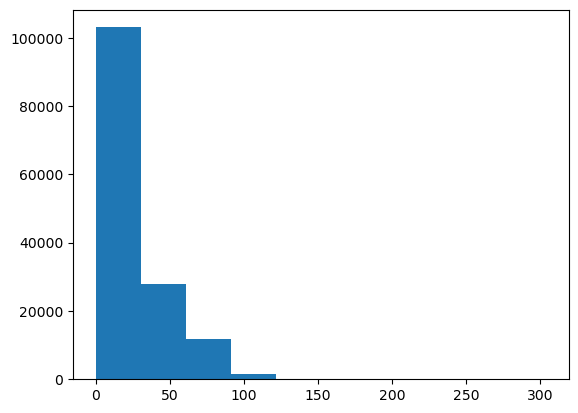

In [18]:
#data visualization library
import matplotlib.pyplot as plt
plt.hist(list(train_data_final['clean_comment_text'].str.split().map(lambda x: len(x))))

In [19]:
np.median(np.array(train_data_final['clean_comment_text'].str.split().map(lambda x: len(x))))


18.0

In [20]:
embedding_dict = pd.read_pickle('glove.840B.300d.pkl')

In [21]:
# Sequences creation, truncation and padding

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Setting up the tokenizer
vocab_size = 10000
tokenizer = Tokenizer(num_words = vocab_size, oov_token = 'UNK')
tokenizer.fit_on_texts(list(train_data_final['clean_comment_text']))

max_len = 18
X_train_seq = tokenizer.texts_to_sequences(train_data_final['clean_comment_text'])

X_train_seq = pad_sequences(X_train_seq, maxlen = max_len, truncating = 'post', padding = 'post')
#X_test_seq = pad_sequences(X_test_seq, maxlen = max_len, truncating = 'post', padding = 'post')


print(f"X_train shape: {X_train_seq.shape}")


X_train shape: (144334, 18)


In [22]:
y_train = np.array(train_data_final[possible_labels1]).astype(int)
print(f"y_train shape: {y_train.shape}")

y_train shape: (144334, 5)


In [35]:
y_train

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0]])

In [39]:
len(y_train[0])

5

In [37]:
X_train_seq

array([[1681,  724,  823, ...,    0,    0,    0],
       [   2,   73,    5, ..., 1574,    0,    0],
       [  99,  162,  120, ...,  693, 6189, 1289],
       ...,
       [ 126, 3163,  845, ...,  845,  126,  295],
       [ 468,  969,   88, ...,  467,  112,  176],
       [   2,  218,  125, ...,    1, 4801, 1105]])

In [38]:
len(X_train_seq[0])

18

In [23]:
from sklearn.model_selection import train_test_split

X_train_seq, X_val_seq, y_train, y_val = train_test_split(X_train_seq, y_train, test_size = 0.2, random_state = 42)

print(f"X_train shape: {X_train_seq.shape}")
print(f"X_val shape: {X_val_seq.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (115467, 18)
X_val shape: (28867, 18)
y_train shape: (115467, 5)
y_val shape: (28867, 5)


In [24]:
num_words = len(tokenizer.word_index)
print(f"Number of unique words: {num_words}")

Number of unique words: 135845


In [25]:
# Applying GloVE representations on our corpus

embedding_matrix=np.zeros((num_words,300))

for word,i in tokenizer.word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec    
            
embedding_matrix.shape

(135845, 300)

In [26]:
# Setting up the model

from keras import layers
from keras.models import Sequential

def setup_lstm_model(max_len, n_latent_factors):
    
    model = Sequential()
    model.add(layers.Embedding(num_words, n_latent_factors, weights = [embedding_matrix], 
                               input_length = max_len, trainable = False))
    model.add(layers.LSTM(units = max_len, return_sequences = True))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(units = 5, activation = 'sigmoid'))
    
    return model

In [27]:
lstm_model = setup_lstm_model(max_len = max_len, n_latent_factors = 300)
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 300)           40753500  
                                                                 
 lstm (LSTM)                 (None, 18, 18)            22968     
                                                                 
 global_average_pooling1d (  (None, 18)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 5)                 95        
                                                                 
Total params: 40776563 (155.55 MB)
Trainable params: 23063 (90.09 KB)
Non-trainable params: 40753500 (155.46 MB)
_________________________________________________________________


In [28]:
# Final hyperparameter configurations
lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

batch_size = 128
epochs = 10

lstm_model.fit(X_train_seq, y_train, epochs=epochs, batch_size = batch_size, validation_data = (X_val_seq, y_val))


Epoch 1/10


903/903 [==============================] - 17s 15ms/step - loss: 0.2375 - accuracy: 0.7603 - val_loss: 0.1950 - val_accuracy: 0.7584
Epoch 2/10
903/903 [==============================] - 12s 13ms/step - loss: 0.1861 - accuracy: 0.7616 - val_loss: 0.1810 - val_accuracy: 0.7712
Epoch 3/10
903/903 [==============================] - 12s 13ms/step - loss: 0.1767 - accuracy: 0.7694 - val_loss: 0.1762 - val_accuracy: 0.7740
Epoch 4/10
903/903 [==============================] - 13s 15ms/step - loss: 0.1720 - accuracy: 0.7726 - val_loss: 0.1734 - val_accuracy: 0.7765
Epoch 5/10
903/903 [==============================] - 12s 13ms/step - loss: 0.1685 - accuracy: 0.7752 - val_loss: 0.1732 - val_accuracy: 0.7757
Epoch 6/10
903/903 [==============================] - 13s 14ms/step - loss: 0.1658 - accuracy: 0.7763 - val_loss: 0.1718 - val_accuracy: 0.7770
Epoch 7/10
903/903 [==============================] - 12s 13ms/step - loss: 0.1636 - accuracy: 0.7777 - val_loss: 0.1702 - val_accura

In [41]:
y_pred=lstm_model.predict(X_val_seq)


903/903 [==============================] - 4s 5ms/step


In [44]:
y_pred

array([[5.96681843e-03, 1.41671896e-01, 5.70879765e-02, 8.93187106e-01,
        2.10904703e-01],
       [1.12888617e-02, 9.73801196e-01, 1.55667942e-02, 8.17489326e-01,
        1.03130326e-01],
       [1.70386257e-03, 1.66487694e-02, 5.86530520e-03, 9.98089790e-01,
        7.16826618e-02],
       ...,
       [7.34801870e-04, 2.32207067e-02, 3.51227424e-03, 9.97228622e-01,
        2.05972508e-01],
       [1.49108411e-03, 4.60464582e-02, 6.91944361e-03, 9.91887152e-01,
        4.32014652e-02],
       [4.39374038e-04, 1.25186034e-02, 2.38021533e-03, 9.99348760e-01,
        4.00637761e-02]], dtype=float32)

In [29]:
lstm_model.history.history


{'loss': [0.2375330626964569,
  0.1861322969198227,
  0.17668399214744568,
  0.17196819186210632,
  0.16845563054084778,
  0.1658141314983368,
  0.16362452507019043,
  0.16176152229309082,
  0.1600281000137329,
  0.15872350335121155],
 'accuracy': [0.7602518200874329,
  0.7615768909454346,
  0.7693886756896973,
  0.7725670337677002,
  0.775199830532074,
  0.7762910723686218,
  0.7776767611503601,
  0.7787073254585266,
  0.7802835702896118,
  0.7805433869361877],
 'val_loss': [0.195040762424469,
  0.18098825216293335,
  0.1761654168367386,
  0.17341168224811554,
  0.1731591373682022,
  0.1718071699142456,
  0.17021755874156952,
  0.16954009234905243,
  0.16959747672080994,
  0.16904902458190918],
 'val_accuracy': [0.7584438920021057,
  0.7711920142173767,
  0.7740326523780823,
  0.7765268087387085,
  0.7756608128547668,
  0.7769771814346313,
  0.7815152406692505,
  0.7788131833076477,
  0.7773582339286804,
  0.7794367074966431]}

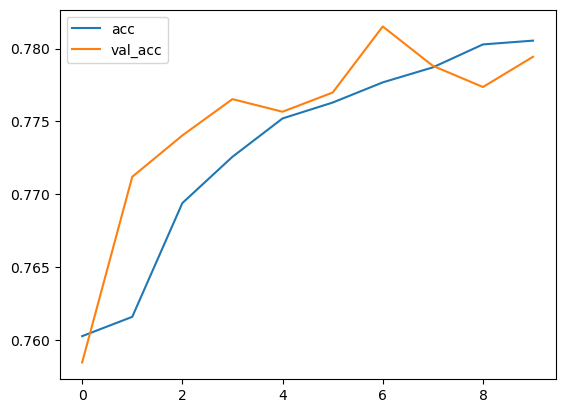

Training Accuracy is  : 0.7805433869361877
Validation Accuracy is: 0.7815152406692505


In [30]:
# accuracies
plt.plot(lstm_model.history.history['accuracy'], label='acc')
plt.plot(lstm_model.history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

print("Training Accuracy is  :",max(lstm_model.history.history['accuracy']))
print("Validation Accuracy is:",max(lstm_model.history.history['val_accuracy']))


In [31]:
def setup_gru_model(max_len, n_latent_factors):
    
    model = Sequential()
    model.add(layers.Embedding(num_words, n_latent_factors, weights = [embedding_matrix], 
                               input_length = max_len, trainable = False))
    model.add(layers.GRU(units = max_len, return_sequences = True))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(units = 5, activation = 'sigmoid'))
    
    return model

In [32]:
gru_model = setup_gru_model(max_len = max_len, n_latent_factors = 300)
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 300)           40753500  
                                                                 
 gru (GRU)                   (None, 18, 18)            17280     
                                                                 
 global_average_pooling1d_1  (None, 18)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 5)                 95        
                                                                 
Total params: 40770875 (155.53 MB)
Trainable params: 17375 (67.87 KB)
Non-trainable params: 40753500 (155.46 MB)
_________________________________________________________________


In [33]:
# Final hyperparameter configurations and fitting
gru_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

batch_size = 128
epochs = 10

gru_model.fit(X_train_seq, y_train, epochs=epochs, batch_size = batch_size, validation_data = (X_val_seq, y_val))

Epoch 1/10
903/903 [==============================] - 12s 11ms/step - loss: 0.2381 - accuracy: 0.7489 - val_loss: 0.1901 - val_accuracy: 0.7607
Epoch 2/10
903/903 [==============================] - 11s 12ms/step - loss: 0.1829 - accuracy: 0.7642 - val_loss: 0.1782 - val_accuracy: 0.7699
Epoch 3/10
903/903 [==============================] - 11s 12ms/step - loss: 0.1745 - accuracy: 0.7716 - val_loss: 0.1738 - val_accuracy: 0.7749
Epoch 4/10
903/903 [==============================] - 12s 13ms/step - loss: 0.1698 - accuracy: 0.7748 - val_loss: 0.1706 - val_accuracy: 0.7783
Epoch 5/10
903/903 [==============================] - 11s 12ms/step - loss: 0.1667 - accuracy: 0.7766 - val_loss: 0.1694 - val_accuracy: 0.7823
Epoch 6/10
903/903 [==============================] - 11s 12ms/step - loss: 0.1645 - accuracy: 0.7781 - val_loss: 0.1684 - val_accuracy: 0.7793
Epoch 7/10
903/903 [==============================] - 12s 13ms/step - loss: 0.1626 - accuracy: 0.7792 - val_loss: 0.1682 - val_accuracy:

In [45]:
gru_model.predict(X_val_seq)

903/903 [==============================] - 5s 5ms/step


array([[7.8342520e-03, 3.3951437e-01, 5.9767101e-02, 8.6641234e-01,
        4.0953237e-01],
       [1.8362520e-02, 9.7572911e-01, 2.5234602e-02, 6.9979692e-01,
        6.7192949e-02],
       [2.0359568e-03, 2.7512074e-02, 5.6561525e-03, 9.9848825e-01,
        7.6373741e-02],
       ...,
       [5.7686132e-04, 1.0766483e-02, 3.2084377e-03, 9.9877870e-01,
        1.3286246e-01],
       [2.0347636e-03, 6.1970152e-02, 1.2599469e-02, 9.9545127e-01,
        3.2614287e-02],
       [8.3151553e-04, 1.6930256e-02, 2.2558158e-03, 9.9970669e-01,
        2.1284670e-02]], dtype=float32)

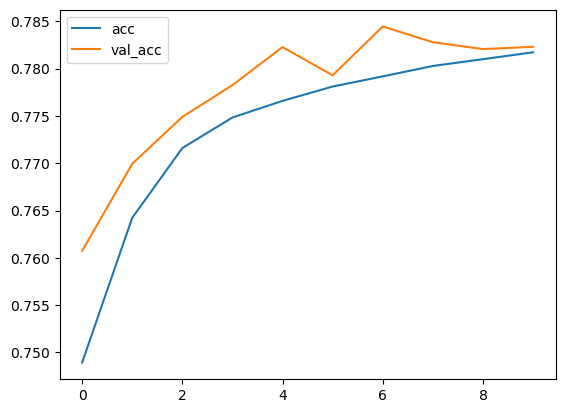

Training Accuracy is  : 0.7817298173904419
Validation Accuracy is: 0.7844597697257996


In [34]:
# accuracies
plt.plot(gru_model.history.history['accuracy'], label='acc')
plt.plot(gru_model.history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

print("Training Accuracy is  :",max(gru_model.history.history['accuracy']))
print("Validation Accuracy is:",max(gru_model.history.history['val_accuracy']))